In [33]:
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

Intentaremos calcular Pi utilizando el método de Montecarlo

Creamos una función para elegir un número aleatorio en el plano cartesiano, entre (0,0) y (1,1)

In [86]:
def elegir_punto_aleatorio():
    """
    Genera un punto aleatorio (x, y) en el rango [0, 1) para ambas coordenadas.

    Returns
    -------
    tuple of float
        Las coordenadas (x, y) del punto aleatorio.

    Examples
    --------
    >>> elegir_punto_aleatorio()
    (0.123456789, 0.987654321)

    Notes
    -----
    La función utiliza la biblioteca `random` de Python para generar
    las coordenadas aleatorias. La generación es uniforme sobre el rango [0, 1).

    """
    x, y = random.random(), random.random()
    return x,y

Calculamos si el punto se encontraría dentro de un círculo de radio 1 con centro en (0,0)

In [44]:
def calcular_dentro_del_circulo(x, y):
    """
    Determina si un punto con coordenadas (x, y) está dentro de un círculo de radio 1 centrado en el origen.

    Parameters
    ----------
    x : float
        Coordenada x del punto.
    y : float
        Coordenada y del punto.

    Returns
    -------
    bool
        Devuelve True si el punto está dentro del círculo, y False de lo contrario.

    Examples
    --------
    >>> calcular_dentro_del_circulo(0.5, 0.5)
    True
    >>> calcular_dentro_del_circulo(1, 1)
    False

    Notes
    -----
    La función calcula la distancia al origen del punto (x, y) y compara si esta distancia
    es menor o igual a 1, que es el radio del círculo. 
    """
    distancia_al_origen = x ** 2 + y ** 2
    if distancia_al_origen <= 1:
        return True
    else:
        return False

Ahora creamos la función para utilizar el método Montecarlo

In [65]:
def simular_puntos_aleatorios(n_puntos, con_dibujo=False):
    """
    Simula n_puntos aleatorios para estimar el valor de π utilizando el método de Montecarlo.

    Parameters
    ----------
    n_puntos : int
        Número de puntos aleatorios a generar para la simulación.
    con_dibujo : bool, optional
        Si es True, muestra un gráfico de los puntos y la aproximación de π. 
        Por defecto es False.

    Returns
    -------
    list of float
        Lista de aproximaciones de π basadas en la simulación de Montecarlo en cada iteración.

    Examples
    --------
    >>> simular_puntos_aleatorios(1000)
    [3.004, 3.112, ..., 3.128]
    >>> simular_puntos_aleatorios(1000, con_dibujo=True)
    # Muestra un gráfico y devuelve la lista de aproximaciones, por ejemplo, [3.004, 3.112, ..., 3.128]

    Notes
    -----
    La función genera n_puntos aleatorios en el rango [0, 1) para ambas coordenadas x y y.
    Utiliza la función `calcular_dentro_del_circulo` para determinar si cada punto está dentro de 
    un círculo de radio 1 centrado en el origen.

    Si `con_dibujo` es True, la función también produce un gráfico que muestra todos los puntos 
    aleatorios y su ubicación relativa al círculo, además de la aproximación de π.

    La barra de progreso de la simulación se muestra gracias a la biblioteca `tqdm`.

    La lista `aproximaciones_pi` contiene las estimaciones de π en cada iteración.
    """
    puntos_dentro = 0
    aproximaciones_pi = []
    
    if con_dibujo:
        x_dentro = []
        y_dentro = []
        x_fuera = []
        y_fuera = []
        for iteracion in tqdm(range(n_puntos)):
            x, y = elegir_punto_aleatorio()
            resultado = calcular_dentro_del_circulo(x, y)
            if resultado:
                puntos_dentro += 1
                x_dentro.append(x)
                y_dentro.append(y)
            else:
                x_fuera.append(x)
                y_fuera.append(y)
        
            pi_aproximado = (puntos_dentro / (iteracion + 1)) * 4
            aproximaciones_pi.append(pi_aproximado)

        # Graficar los puntos y el círculo
        plt.figure(figsize=(6, 6))
        plt.scatter(x_dentro, y_dentro, color='green', label='Dentro del círculo')
        plt.scatter(x_fuera, y_fuera, color='red', label='Fuera del círculo')
        plt.title(f"Aproximación de π usando Montecarlo: {pi_aproximado}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
    else:
        for iteracion in tqdm(range(n_puntos)):
            x, y = elegir_punto_aleatorio()
            resultado = calcular_dentro_del_circulo(x, y)
            if resultado:
                puntos_dentro += 1

            pi_aproximado = (puntos_dentro / (iteracion + 1)) * 4
            aproximaciones_pi.append(pi_aproximado)
    return aproximaciones_pi

100%|█████████████████████████████████████| 500/500 [00:00<00:00, 114273.76it/s]


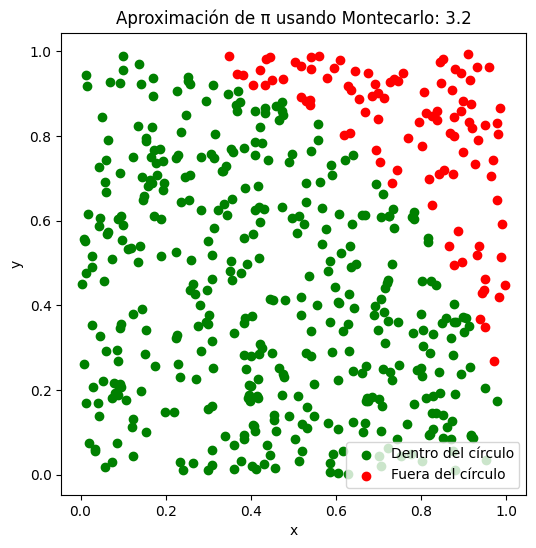

In [66]:
lista_pi_aproximados = simular_puntos_aleatorios(n_puntos=500,con_dibujo=True)

In [82]:
lista_pi_aproximados = simular_puntos_aleatorios(n_puntos=500000,con_dibujo=False)

100%|███████████████████████████████| 500000/500000 [00:00<00:00, 837527.46it/s]


In [83]:
def graficar_aproximacion_pi(aproximaciones_pi):
    # Graficar la aproximación de Pi en función de n_puntos
    plt.figure(figsize=(10, 6))
    
    # Generar lista de índices, comenzando desde 1 hasta la longitud de aproximaciones_pi
    indices = [i+1 for i in range(len(aproximaciones_pi))]
    
    plt.plot(indices, aproximaciones_pi, marker='.', label="Aproximación de π")
    plt.axhline(y=3.14159, color='r', linestyle='--', label="Valor verdadero de π")
    
    plt.title(f"Aproximación de π en función de n_puntos (Aproximado {round(aproximaciones_pi[-1], 4)})")
    plt.xlabel("Número de puntos")
    plt.ylabel("Aproximación de π")
    plt.legend()
    plt.show()


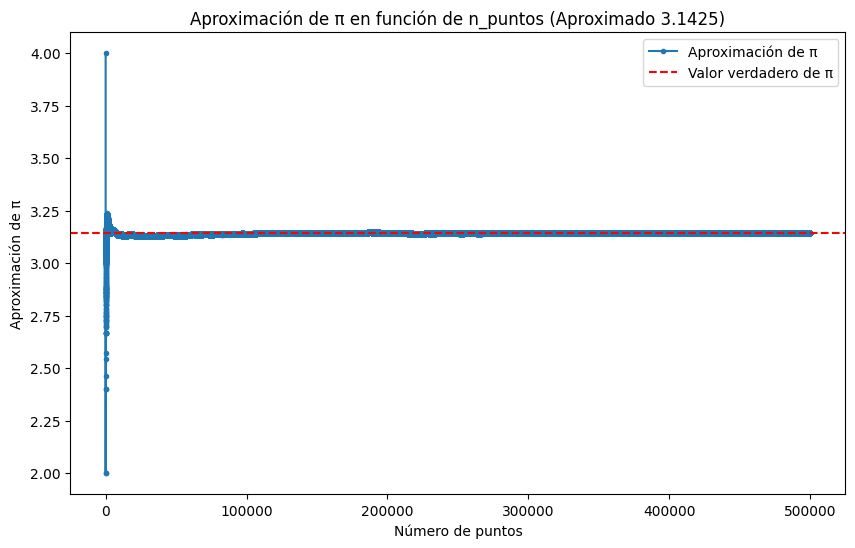

In [84]:
graficar_aproximacion_pi(lista_pi_aproximados)